In [7]:
# E3.ipynb

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [8]:
# To ensure reproducibility
np.random.seed(42)

# Read data from Excel file
file_path = 'E3.xlsx'
train_data = pd.read_excel(file_path, sheet_name='train')
test_data = pd.read_excel(file_path, sheet_name='test')

In [9]:
# Separate features and target variable in train data
X_train = train_data.drop(columns=['y'])
y_train = train_data['y']

# Separate features and target variable in test data
X_test = test_data.drop(columns=['y'])
y_test = test_data['y']

In [10]:
# # Adding outliers (UNCOMMENT ONLY WHEN REQUIRED! SEE THE PROBLEM STATEMENTs ...)
# X_train = np.array(list(X_train['x1']) + [X_train['x1'].mean() + x for x in np.random.randn(5)]).reshape(-1,1)
# y_train = np.array(list(y_train) + [y_train.max() + 4 + x for x in np.random.randn(5)])

In [11]:
# Use PolynomialFeatures to create features
poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [12]:
print(X_train_poly)

[[1.00000000e+00 7.61428571e+00 5.79773469e+01 ... 1.12988268e+07
  8.60324956e+07 6.55076002e+08]
 [1.00000000e+00 7.62142857e+00 5.80861735e+01 ... 1.13838999e+07
  8.67615803e+07 6.61247187e+08]
 [1.00000000e+00 7.62857143e+00 5.81951020e+01 ... 1.14695330e+07
  8.74961519e+07 6.67470645e+08]
 ...
 [1.00000000e+00 1.25857143e+01 1.58400204e+02 ... 6.29539445e+08
  7.92320359e+09 9.97191766e+10]
 [1.00000000e+00 1.25928571e+01 1.58580051e+02 ... 6.32403424e+08
  7.96376598e+09 1.00286567e+11]
 [1.00000000e+00 1.26000000e+01 1.58760000e+02 ... 6.35278797e+08
  8.00451285e+09 1.00856862e+11]]


In [13]:
print(X_train_poly)

[[1.00000000e+00 7.61428571e+00 5.79773469e+01 ... 1.12988268e+07
  8.60324956e+07 6.55076002e+08]
 [1.00000000e+00 7.62142857e+00 5.80861735e+01 ... 1.13838999e+07
  8.67615803e+07 6.61247187e+08]
 [1.00000000e+00 7.62857143e+00 5.81951020e+01 ... 1.14695330e+07
  8.74961519e+07 6.67470645e+08]
 ...
 [1.00000000e+00 1.25857143e+01 1.58400204e+02 ... 6.29539445e+08
  7.92320359e+09 9.97191766e+10]
 [1.00000000e+00 1.25928571e+01 1.58580051e+02 ... 6.32403424e+08
  7.96376598e+09 1.00286567e+11]
 [1.00000000e+00 1.26000000e+01 1.58760000e+02 ... 6.35278797e+08
  8.00451285e+09 1.00856862e+11]]


In [14]:
# # standardization of the data
# scaler = StandardScaler()
# X_train_poly = scaler.fit_transform(X_train_poly)
# X_test_poly = scaler.transform(X_test_poly)

In [15]:
poly.get_feature_names_out()

array(['1', 'x1', 'x1^2', 'x1^3', 'x1^4', 'x1^5', 'x1^6', 'x1^7', 'x1^8',
       'x1^9', 'x1^10'], dtype=object)

In [16]:
####################################
# Save the augmented data set to a file for review

# Create dataframe with test data and additional features
# Get feature names
feature_names = poly.get_feature_names_out()
augmented_data = pd.DataFrame(X_train_poly, columns=feature_names)
augmented_data['y'] = train_data['y']

# # Write dataframe to CSV
augmented_data.to_csv('augmented_train_data.csv', index=False)
####################################
####################################
# Save the augmented data set to a file for review

# Create dataframe with test data and additional features
# Get feature names
feature_names = poly.get_feature_names_out()
augmented_data = pd.DataFrame(X_test_poly, columns=feature_names)
augmented_data['y'] = test_data['y']

# # Write dataframe to CSV
augmented_data.to_csv('augmented_test_data.csv', index=False)
####################################

In [17]:
# Algorithms
algorithms = {
    'Linear Regression': LinearRegression(),
    'SVM Regression': SVR(kernel='rbf'),  # Adjust kernel as needed
    'RandomForest': RandomForestRegressor(),
    'XGBoost': GradientBoostingRegressor(),
    'knn': KNeighborsRegressor(),
    'Neural Network-10': MLPRegressor(hidden_layer_sizes=[10], max_iter=20000),
}

# Metric tables
metric_table_train = pd.DataFrame()
metric_table_test = pd.DataFrame()

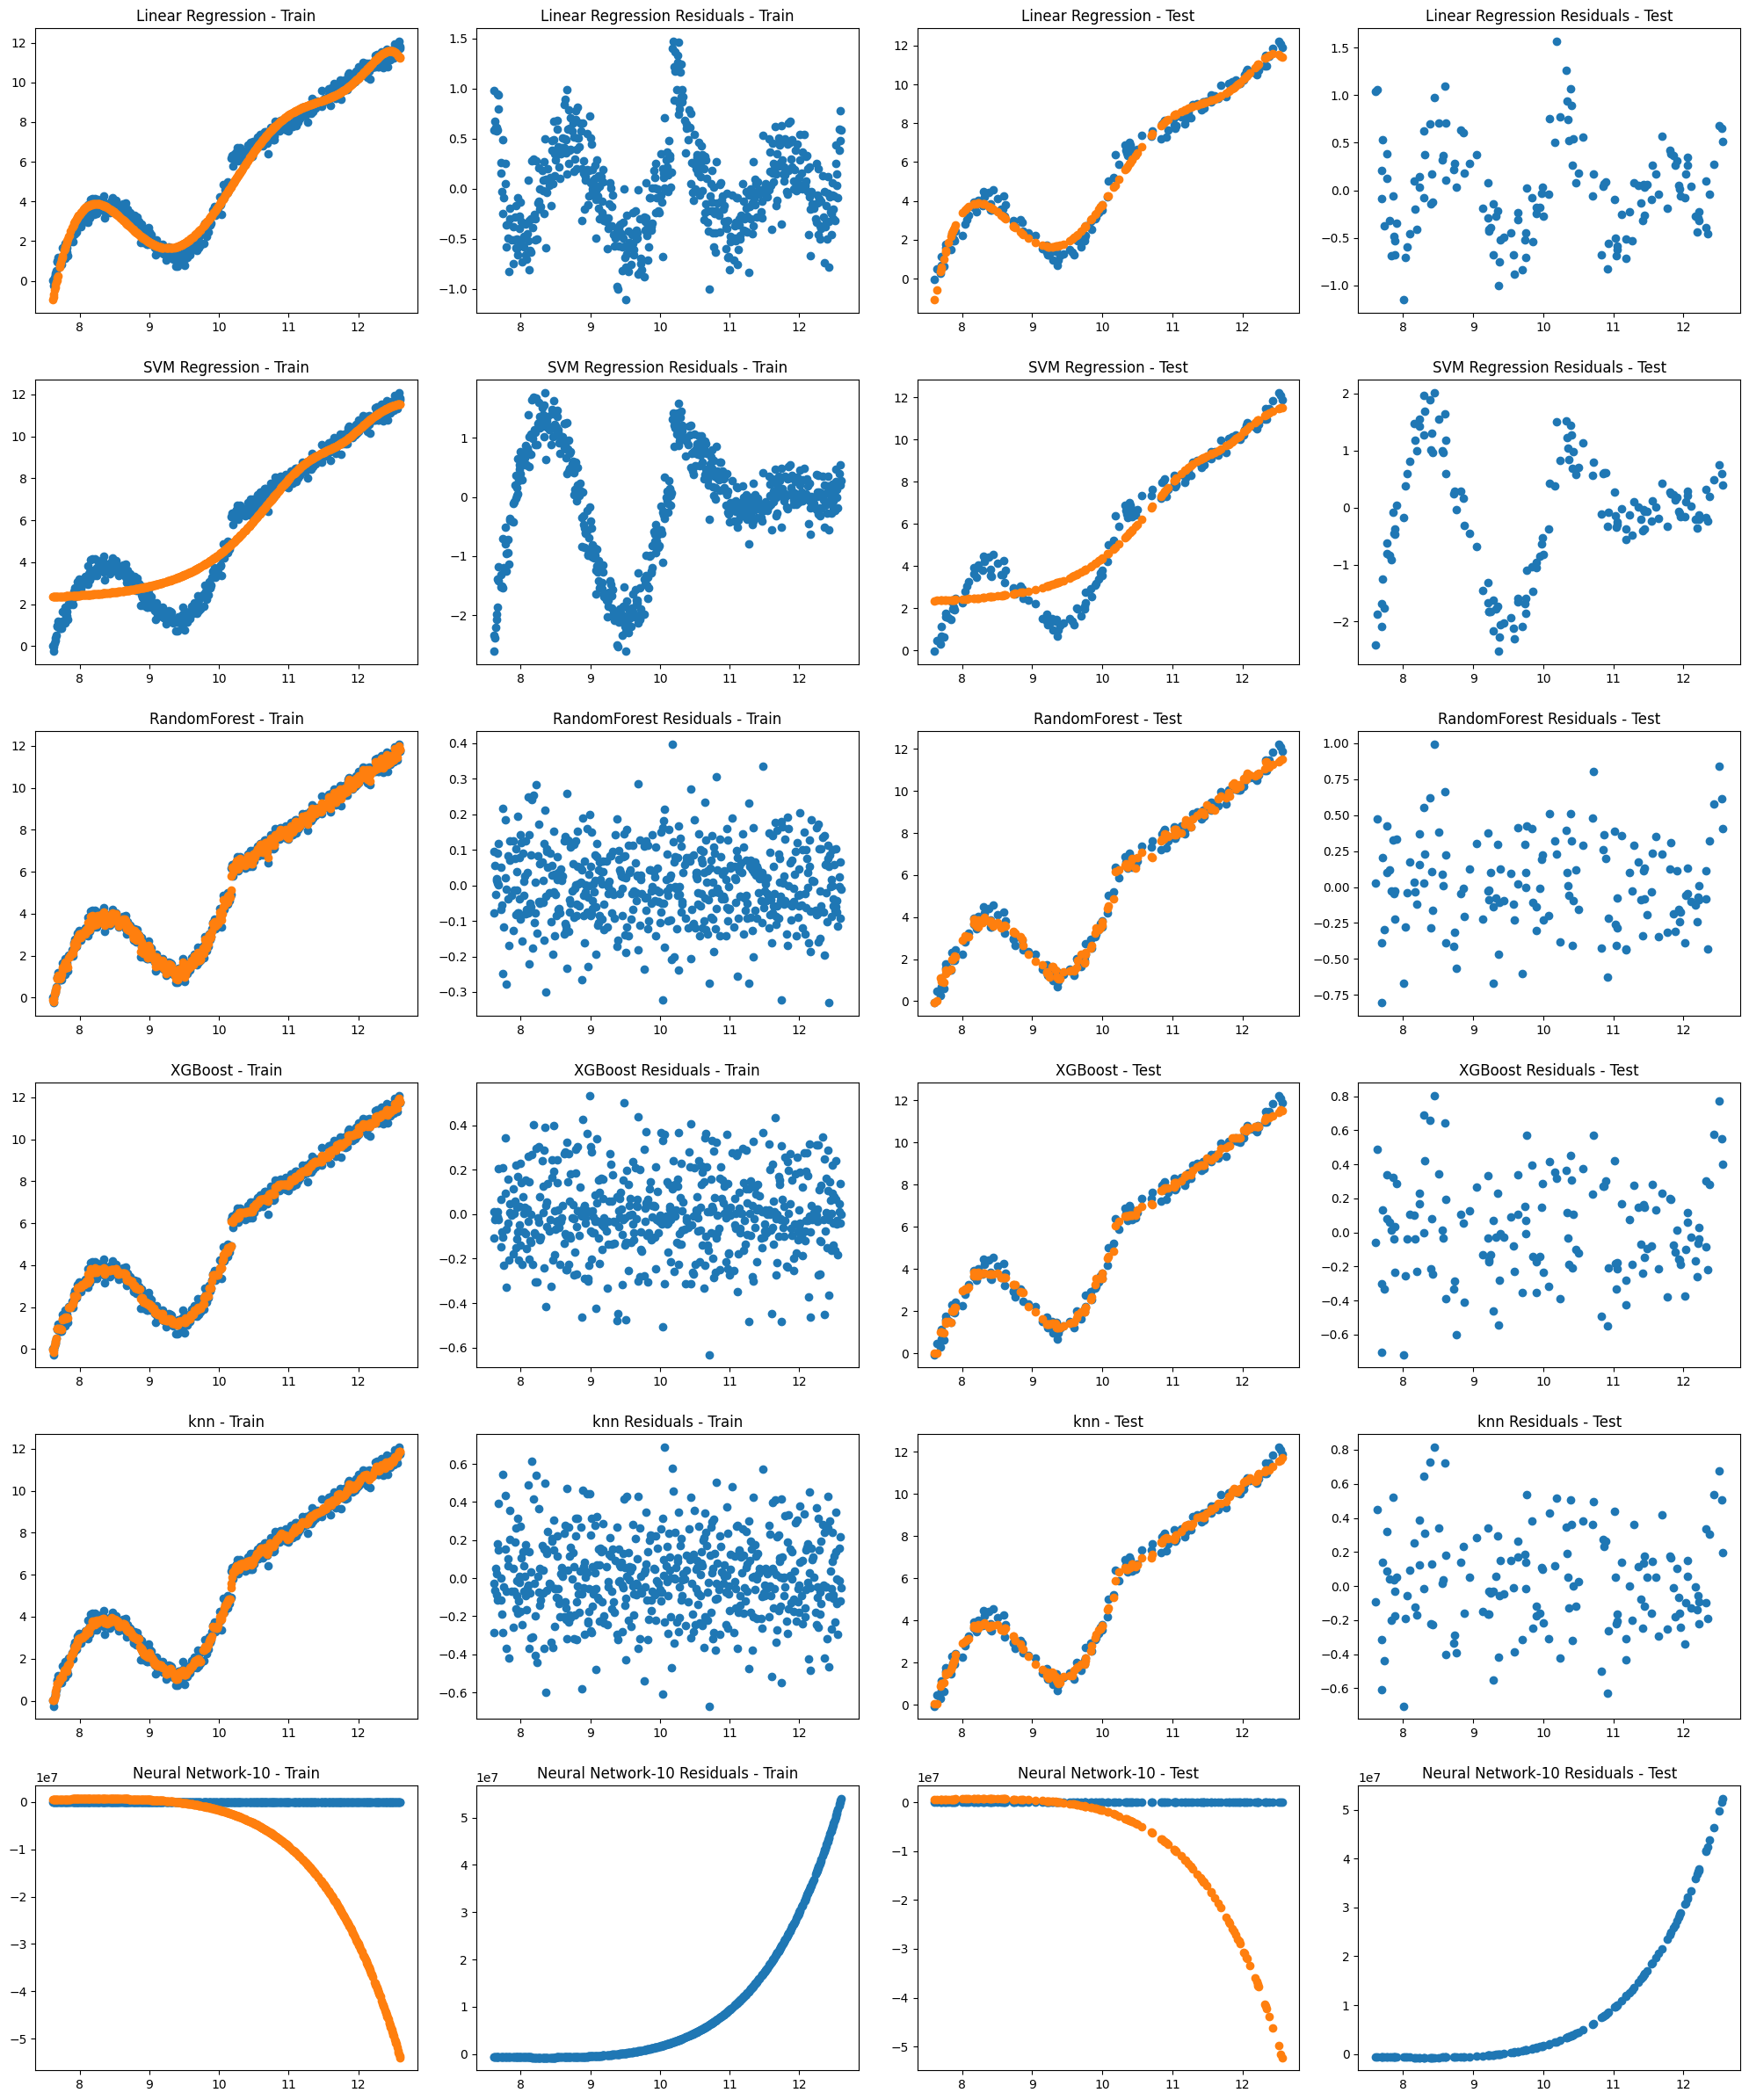

In [18]:
# Create a grid of subplots
fig, axs = plt.subplots(len(algorithms), 4, figsize=(20, 4 * len(algorithms)))
fig_row = -1

# Run the algorithms ... create metrics and plots
for algorithm_name, algorithm in algorithms.items():

    # Train model
    algorithm.fit(X_train_poly, y_train)

    # Train predictions
    y_train_pred = algorithm.predict(X_train_poly)

    # Test predictions
    y_test_pred = algorithm.predict(X_test_poly)

    # Train metrics
    r2_train = algorithm.score(X_train_poly, y_train)
    rmse_train = root_mean_squared_error(y_train, y_train_pred)

    # Test metrics
    r2_test = algorithm.score(X_test_poly, y_test)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)

    # Additional metrics using statsmodels for all algorithms
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred

    durbin_watson_stat_train = sm.stats.durbin_watson(residuals_train)
    jb_stat_train, jb_p_value_train, _, _ = sm.stats.jarque_bera(residuals_train)

    durbin_watson_stat_test = sm.stats.durbin_watson(residuals_test)
    jb_stat_test, jb_p_value_test, _, _ = sm.stats.jarque_bera(residuals_test)

    # Update metric tables
    metric_table_train.at[algorithm_name, 'R-squared'] = r2_train
    metric_table_train.at[algorithm_name, 'RMSE'] = rmse_train
    metric_table_train.at[algorithm_name, 'Durbin-Watson'] = durbin_watson_stat_train
    metric_table_train.at[algorithm_name, 'Jarque-Bera'] = jb_stat_train
    metric_table_train.at[algorithm_name, 'JB P-value'] = jb_p_value_train

    metric_table_test.at[algorithm_name, 'R-squared'] = r2_test
    metric_table_test.at[algorithm_name, 'RMSE'] = rmse_test
    metric_table_test.at[algorithm_name, 'Durbin-Watson'] = durbin_watson_stat_test
    metric_table_test.at[algorithm_name, 'Jarque-Bera'] = jb_stat_test
    metric_table_test.at[algorithm_name, 'JB P-value'] = jb_p_value_test

    # Create the plots
    fig_row = fig_row+1

    axs[fig_row, 0].scatter(X_train, y_train)
    axs[fig_row, 0].scatter(X_train, y_train_pred)
    axs[fig_row, 0].set_title(algorithm_name + " - Train")

    axs[fig_row, 1].scatter(X_train, residuals_train)
    axs[fig_row, 1].set_title(algorithm_name + " Residuals - Train")

    axs[fig_row, 2].scatter(X_test, y_test)
    axs[fig_row, 2].scatter(X_test, y_test_pred)
    axs[fig_row, 2].set_title(algorithm_name + " - Test")

    axs[fig_row, 3].scatter(X_test, residuals_test)
    axs[fig_row, 3].set_title(algorithm_name + " Residuals - Test")
############################

plt.tight_layout()
plt.show()

In [19]:
# Display the metrics' Tables
print("Metrics - Train Data:\n")
print(metric_table_train.to_string())
print("-------------------------------------------------")

print("Metrics - Test Data:\n")
print(metric_table_test.to_string())

Metrics - Train Data:

                      R-squared          RMSE  Durbin-Watson  Jarque-Bera    JB P-value
Linear Regression  9.827069e-01  4.543007e-01       0.572057    18.489214  9.663139e-05
SVM Regression     9.200181e-01  9.770195e-01       0.124161    28.845906  5.447422e-07
RandomForest       9.989994e-01  1.092800e-01       2.930430     3.250107  1.969011e-01
XGBoost            9.971463e-01  1.845492e-01       2.372918     1.046859  5.924852e-01
knn                9.958949e-01  2.213447e-01       2.505231     0.733304  6.930509e-01
Neural Network-10 -2.457190e+13  1.712485e+07       0.000101   245.456189  5.010323e-54
-------------------------------------------------
Metrics - Test Data:

                      R-squared          RMSE  Durbin-Watson  Jarque-Bera    JB P-value
Linear Regression  9.801501e-01  4.960630e-01       0.707796     4.669791  9.682061e-02
SVM Regression     9.060659e-01  1.079118e+00       0.151191     3.826565  1.475951e-01
RandomForest       9.9176

we have to select beween RF XG KNN. The R2 are comaprable but the RMSE is least for Random forest by quite a margin. XG boost has its DW closest to 2. showing least auto correlation.  Knn give us the best normality distribution and its p value is 0.07 thus we cant reject H0(it is normal). For xg boost we have slight deviation from normal. Its p value is close to 0.06 thus we will go with normality. We reject random forest method. it has low p value.


thus it bolis down to knn and xg boost .  knn -  less r2,more rmse,more durbin,, less jb, ok p value. 
i will choose. xg boost as it has less durbin as eroor coorelation is less.


rf.  nn.  overfitting  rbf in svm can incerse our model bheaviour.